## Wilfrido Matthew Enverga 
## Student No. 83234864

### *Research Question/Interests*

I am interested in to see if the region/location of a person holds a significance in terms of rising medical charges for patients in the United States. Moreover, I would like to analyze if there is any connection between the charges to a medical patient and the lifestyle of a patient as well using the 'bmi' and 'smoker' information. Perhaps this will highlight any medical inequalities with different regions in the United States and through this analysis, I hope to shed light on this topic. Given the time constraints I am unsure whether I could delve into this into detail but it would be fascinating to see whether a patient's location and lifestyle could affect medical charges.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [11]:
data_raw = pd.read_csv("../data/raw/insurance/insurance.csv")
data_raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# *Milestone 3*

## *Task 1: Exploratory Data Analysis (EDA)*

#### I will be cleaning up the data in one of the later tasks, but for now I will be looking at the general shape, important attributes to the study,  correlation between these attributes in terms of medical charges, and analyzing the impact of these specific attributes to the possibility of rising medical charges.

In [12]:
data_raw.shape

(1338, 7)

In [13]:
data_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
data_raw.smoker.unique()
data_raw.bmi.unique()
data_raw.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

#### I would also like to see whether there there is a correlation between the region and number of smokers which is why I would like to see how many there are per region and how that plays a role in the medical charges of patients in the United States

In [16]:
data_raw['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
data_raw['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
data_raw.value_counts(["smoker", "region"])

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
dtype: int64

#### Moving forward, I have decided that the 'sex' and 'children' columns will not be as useful in my analysis. I will specifically look into the 'bmi', 'smoker', and 'region' columns as these will help me explain how lifestyle and location affects patient medical charges in the United States. 

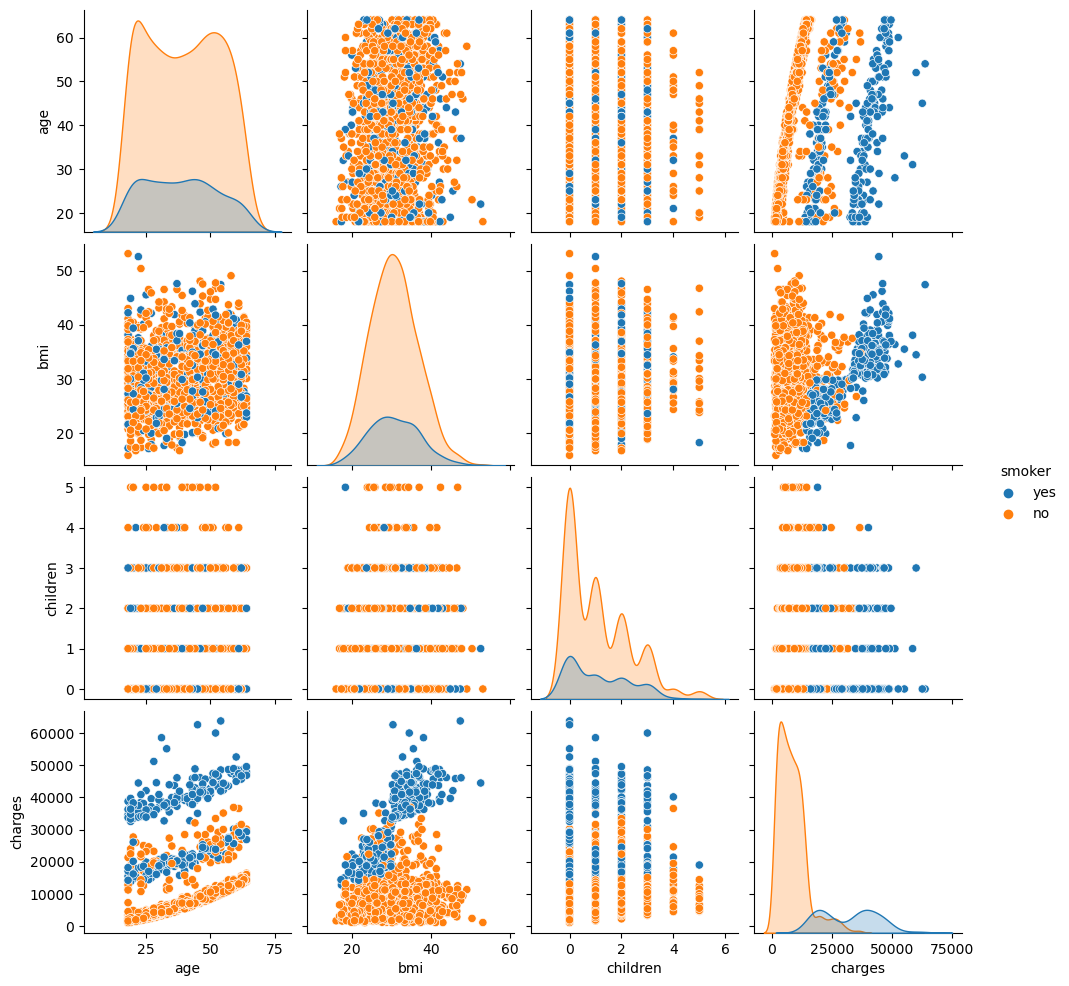

In [19]:
sns.pairplot(data_raw, hue ='smoker')
plt.show()

#### This pairplot helps me identify if there are any significant correlations between the specific characteristics I am looking at. It seems like there is some correlation between smokers, bmi, and charges which is exactly what im looking to interpret. 

Text(0.5, 1.0, 'Medical charge correspondence with Regions in the United States')

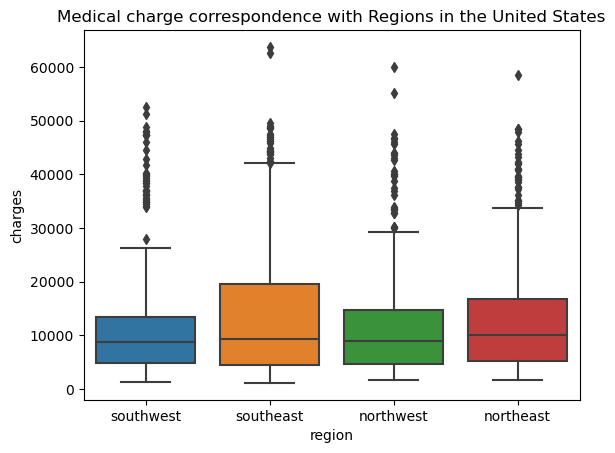

In [20]:
sns.boxplot(x='region',y='charges', data=data_raw)
plt.title("Medical charge correspondence with Regions in the United States")

##### This boxplot displays a 5 number summary for medical expenses in four (4) different regions in the United States. It is clear that the southeast region has a higher average when it comes to being billed by health insurance. The southeast is charges higher than those of its other region counterparts, not by a large margin compared to the northeast however. This implies that there are more medical charges to patients in the southeast and perhaps more access to healthcare benefits than the other regions. 

Text(0.5, 1.0, 'Number of medical patients from 4 different regions in the United States')

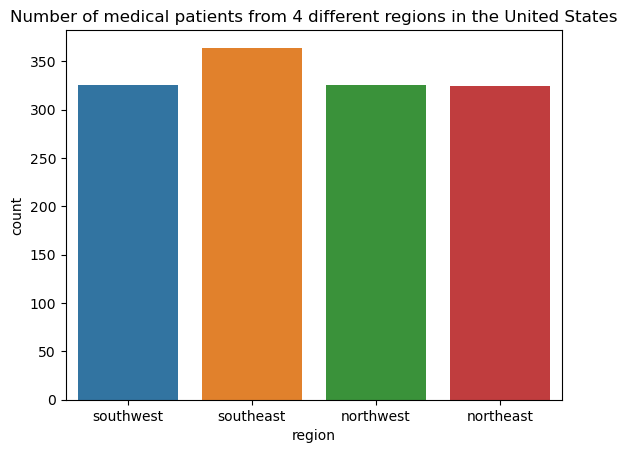

In [21]:
sns.countplot(x='region', data=data_raw)
plt.title("Number of medical patients from 4 different regions in the United States")

##### This countplot shows that the medical expenses dataset gathered the data mostly from patients residing in the southeast region of the United States with, generating data for around 360 patients. The rest of the dataset is gathered from patients residing in the southwest, northwest, and northeast regions with around 310 patients in each region. It is possible that more patient and medical expense data was gathered here due to a higher population or higher amount of medical cases. 

In [22]:
data_raw.value_counts(["smoker", "region"])

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
dtype: int64

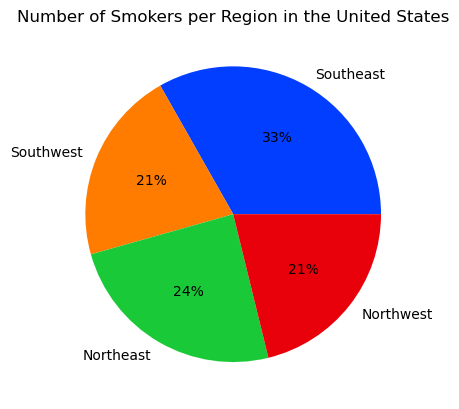

In [23]:
data_raw.value_counts(["smoker", "region"])
data = [91,58,67,58]
labels = ['Southeast', 'Southwest', 'Northeast', 'Northwest']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Number of Smokers per Region in the United States")
plt.show()

#### This pie chart shows that of the 274 people that smoke from the medical insurance dataset, majority of these smokers come from the southeast region of the United States. 


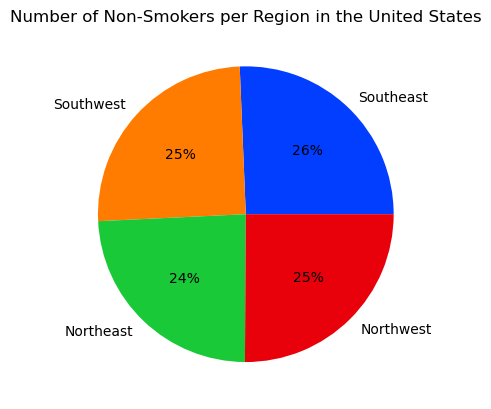

In [24]:
data_raw.value_counts(["smoker", "region"])
data = [273,267,257,267]
labels = ['Southeast', 'Southwest', 'Northeast', 'Northwest']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Number of Non-Smokers per Region in the United States")
plt.show()

#### The pie chart shows the percentages of non-smokers in each significant region of the medical insurance dataset

# Task 2: Data Analysis Pipeline

#### Step 1: Load Data 
#### Step 2: Clean Data 

##### I will be removing the 'children' column for the cleaned up data. I believe that the only columns that will be useful for gathering my evidence wil be the 'charges', 'bmi', 'age', 'smoker' and 'region' columns as those will help me determine if the region holds a significance in the amount of medical charges for patients in the United States, not to mention if lifestyle correlates with the medical charges by insurance companies throughout 4 different regions. 

In [25]:
data_raw = pd.read_csv("../data/raw/insurance/insurance.csv")

In [26]:
data_clean = data_raw.copy().drop(['children', 'sex'], axis=1).dropna(axis=0)
data_clean.reset_index()
data_clean.head()
data_clean

,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520
...,...,...,...,...,...
1333,50,30.970,no,northwest,10600.54830
1334,18,31.920,no,northeast,2205.98080
1335,18,36.850,no,southeast,1629.83350
1336,21,25.800,no,southwest,2007.94500


In [27]:
data_clean['smoker'] = data_clean['smoker'].map({'yes': 1, 'no': 0})
data_clean

,age,bmi,smoker,region,charges
0,19,27.900,1,southwest,16884.92400
1,18,33.770,0,southeast,1725.55230
2,28,33.000,0,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520
...,...,...,...,...,...
1333,50,30.970,0,northwest,10600.54830
1334,18,31.920,0,northeast,2205.98080
1335,18,36.850,0,southeast,1629.83350
1336,21,25.800,0,southwest,2007.94500


In [28]:
data_clean['bmi'] = data_clean['bmi'].round(decimals = 2)
data_clean['charges'] = data_clean['charges'].round(decimals = 2)
data_clean

,age,bmi,smoker,region,charges
0,19,27.90,1,southwest,16884.92
1,18,33.77,0,southeast,1725.55
2,28,33.00,0,southeast,4449.46
3,33,22.70,0,northwest,21984.47
4,32,28.88,0,northwest,3866.86
...,...,...,...,...,...
1333,50,30.97,0,northwest,10600.55
1334,18,31.92,0,northeast,2205.98
1335,18,36.85,0,southeast,1629.83
1336,21,25.80,0,southwest,2007.94


# Task 3: Method Chaining 

##### Now I will be creating a function using a .py file with the following code:

import pandas as pd 

def load_and_process(rawData):
    
    df_clean = (pd.read_csv(rawData).drop(['children', 'sex'], axis=1).dropna(axis=0))
    
    df_clean['smoker'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
    df_clean['bmi'] = df_clean['bmi'].round(decimals = 2)
    df_clean['charges'] = df_clean['charges'].round(decimals = 2)
    
    return df_clean
    
    
    
##### Using this code, I am now able to create and call a function that can load and process data which is essentially the same as my cleaned up data. Now all i have to do is import the function by giving it a name to call. In this case i am using p1 as my function to call.
    

In [29]:
import project_functions1 as p1

##### Afterwards, I assign the load and process function with the "p1" function I just created to df_clean. When I call "df_clean" it gives me all the rows and columns similar to that I have above with "data_clean"

In [30]:
df_clean = p1.load_and_process("../data/raw/insurance/insurance.csv")
df_clean

,age,bmi,smoker,region,charges
0,19,27.90,1,southwest,16884.92
1,18,33.77,0,southeast,1725.55
2,28,33.00,0,southeast,4449.46
3,33,22.70,0,northwest,21984.47
4,32,28.88,0,northwest,3866.86
...,...,...,...,...,...
1333,50,30.97,0,northwest,10600.55
1334,18,31.92,0,northeast,2205.98
1335,18,36.85,0,southeast,1629.83
1336,21,25.80,0,southwest,2007.94


##### Now I would like to indicate the instances of each unique value for both the 'region' and 'smoker' columns so that I can easily input the data for the data analysis section

In [31]:
df_clean['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [32]:
df_clean['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

#### Now that I have cleaned the data, I am able to simply type data_clean and it will reference/show all the information necessary for my data analysis. 

# Task 4: Data Analysis

#### In this segment, I will be explaining my findings based on the data I have organized and compared with other attibutes in the cleaned up dataframe. I will also be using the finalized comparable data graphs to draw up a few of my conclusions. 

<AxesSubplot:title={'center':'Figure 1: Medical Charges for Smokers and Non-Smokers per Region in the United States'}, xlabel='region', ylabel='charges'>

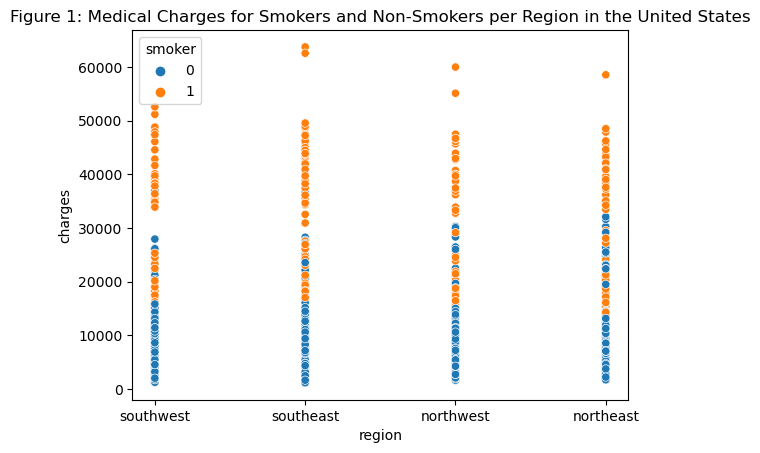

In [33]:
plt.title("Figure 1: Medical Charges for Smokers and Non-Smokers per Region in the United States")
sns.scatterplot(data = df_clean, x ='region', y = 'charges', hue = 'smoker')

#### Figure 1 shows that the majority of smokers come from the southeast region of the United States. It seems that smokers are well above the 10,000 USD range when it comes to medical charges. Comparing this to online sources, we can verify that the data vouches for several findings. According to findings from the American Cancer Society, it would seem that cancer kills more southerners where smoking is more common and tobacco control policies are less strict. Researchers say that nine of 14 states with the least comprehensive smoke-free indoor air policies are in the South. Excise tax in major states for tobacco are mostly located in the south is priced much lower at around 0.49 cents compared to $1.80 elsewhere. The tobacco industry heavily influences these policies and most of the U.S. tobacco crop is grown in the South, the researchers said. The region also has relatively high levels of poverty, which is also linked with smoking. You may find more details using this link [Smoking Kills More Southerners, Study Finds](https://www.nbcnews.com/health/cancer/smoking-kills-more-southerners-study-finds-n671921). We can also see there is a positive correlation between smoker patients and medical charges. The darker shades of orange represent more frequency of charges which are evident in around 18,000 USD to 48,000 USD. 

Text(0.5, 1.0, 'Figure 2: BMI and Smoker Trends for Medical Patient Charges in the United States')

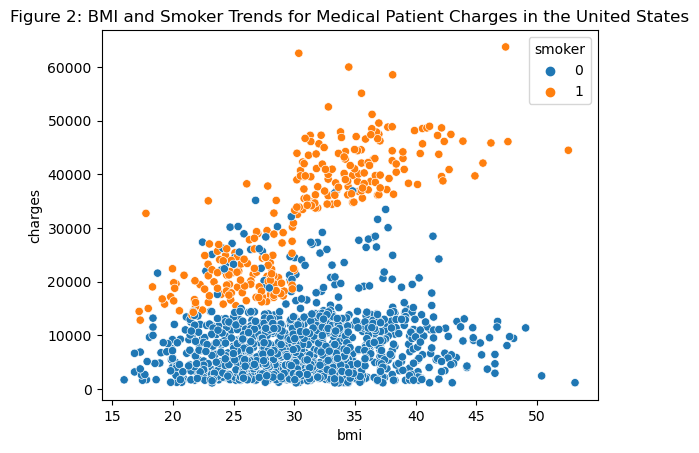

In [34]:
sns.scatterplot(data = df_clean, x = 'bmi', y = 'charges', hue = 'smoker')
plt.title('Figure 2: BMI and Smoker Trends for Medical Patient Charges in the United States')

#### Figure 2 shows that despite the low number of smokers compared to non smokers in the medical insurance dataset, it seems that smokers have a higher bmi and higher medical costs than majority of the non smokers. You can see an upward trend in medical charges with the bulk of the medical charges around the 30,000 USD to 50,000 USD range. We can also say that patients who smoke might have higher bmi's than the average non smoker patient; however, it does not seem like smoking affects a patient's bmi dramatically. It would seem that smoking would keep bmi's lower according to the bulk of the scatterplots being within the normal BMI range of 18.5 - 24.9 while majority of the bmi scatterplots for non-smokers are higher. This could mean that smoking can lead to weight loss because it increases the amount of energy a person uses and creates disruptions to a persons appetite while eating. Then again, it is very difficult to determine whether we can deduce this from the data considering the dataset does not collect an fair sample. 

<AxesSubplot:title={'center':'Figure 3: BMI and Smoker Data per Region for Patients in the United States'}, xlabel='region', ylabel='bmi'>

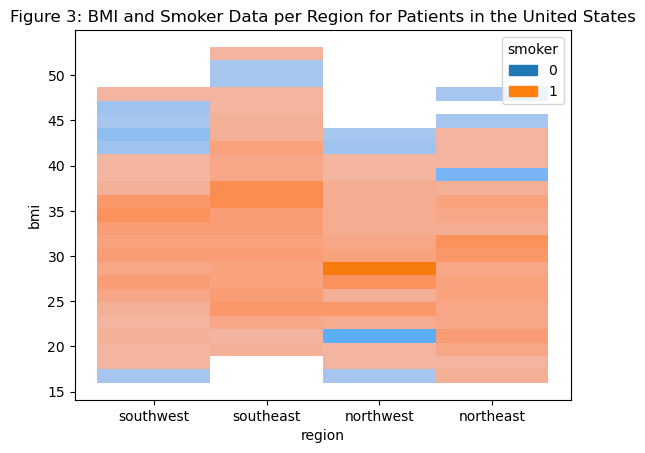

In [35]:
plt.title("Figure 3: BMI and Smoker Data per Region for Patients in the United States")
sns.histplot(data = df_clean, x ='region', y = 'bmi', hue = 'smoker') 

#### Figure 3 shows the bmi as well as smoker data divided by region. The plot suggests that there seems to be a higher average bmi in the southeast and southwest regions. There is a higher frequency of a BMI from an index between 20 - 30 in the northwest and higher BMI frequency in the southeast just above an index of 35. 

### Conclusion

After examining a series of visualizations and the correlation of several aspects of the medical expenses dataset I was able to find an answer to whether lifestlyle and location affects the amount of medical charges charged to a patient. I have come to the conclusion that the region where the patient resides is closesly tied to the rising cost of medical expenses, not to mention that because they live in a certain region they are more likely to engage in activities such as smoking which could explain why there is a high frequency of low bmi in the plots above.  

Figure 1 displays that smokers have a much higher cost of medical charges and are charged upwards of 12,000 USD, much higher than non smokers. In addition, majority of these smokers come from the southern regions of the united states which could entail that people are more likely to smoke here because of the quality of social, medical, or legal conditions. Perhaps their sin tax on cigarettes or tobacco is much lower compared to other states and thus people are more tempted/encouraged to use these products. 

Figure 2 shows the apparent correlations between bmi, medical charges, and smoker. There is a slight positive correlation between bmi and medical charges but the data is not that consistent to prove there is a strong correlation and may require other data to properly interpret. The scatterplot also suggests that there is a slight positive correlation between bmi and being a smoker as well meaning that smokers could possibly have lower bmi's due to loss of appetite and additional consumption of energy. Non-smokers are suggested to gain weight because of an increased appetite and perhaps the lack of exercise and proper diet, then again these are only assumptions based on the data. 

Figure 3 shows that the northern regions have lower bmi's than those of the southwest. Assuming this, it could be that the region does not dramatically impact a person's BMI, however, being a smoker may slightly be correlated to lower BMI's and non smokers to have higher BMI's. Overall it is difficult to say whether the region affects a patient's BMI. 

After analyzing these 3 figures, it appears that location and lifestyle defintiely influence the rising medical costs of a patient in the United States. In terms of location, the data shows that the region might have something to do with rising medical costs. This could be due to several factors such as social conditions and health benefits/policies of the states within the region. In terms of lifestyle, it would seem that being a smoker has something to do with rising medical costs as patients who smoked showed a bigger frequency of higher medical charges compared to non-smokers. BMI had a slight positive correlation but the data proved to be inconsistent with rising medical costs so it would be hard to determine without additional data. Although my research question was answered, there is still uncertainty when it comes to the relation of location and lifestyle with medical charges. 

In [36]:
from pathlib import Path

filepath = Path('../data/processed/Enverga_Data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(filepath)